# クローバー動作解析

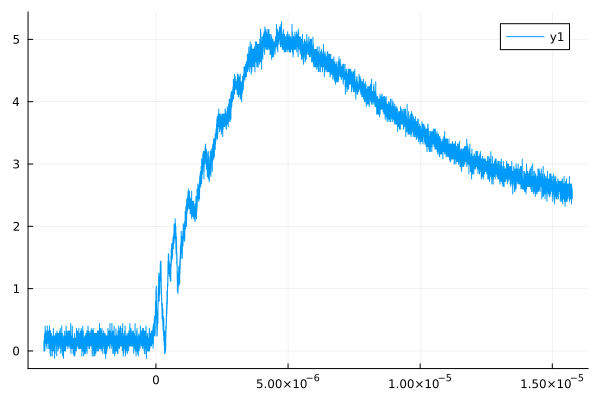

In [72]:
using Plots
using DataFrames
using CSV
using LsqFit
using LaTeXStrings

df = CSV.read("data/D05AB_SC90.CSV", DataFrame)
plot(df.Time, df.Volt)

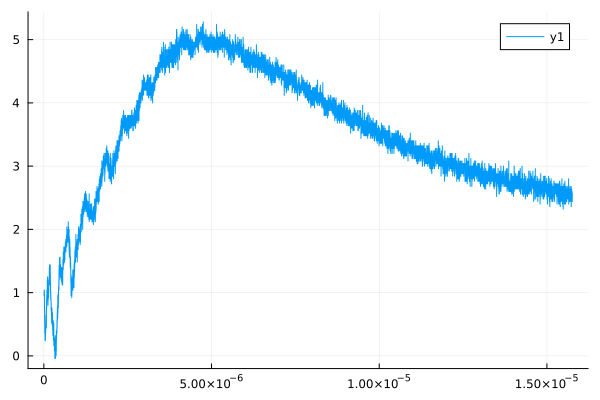

In [73]:
df1 = df[df.Time.>0,:]
plot(df1.Time, df1.Volt)

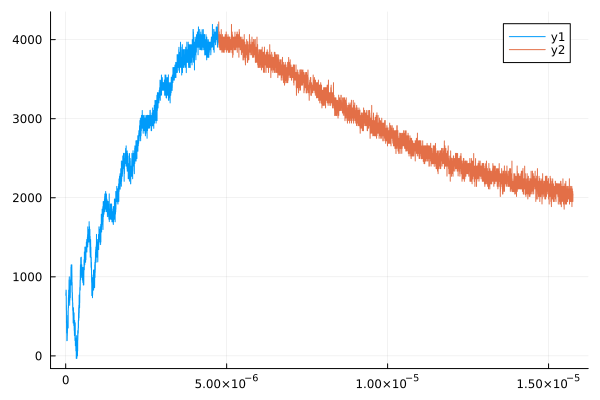

In [75]:
t1 = df1[df1.Volt.>=maximum(df1.Volt), :]
df2 = df1[df1.Time.< t1.Time, :]
plot(df2.Time, df2.Volt*800)
df3 = df1[df1.Time.>= t1.Time, :]
plot!(df3.Time, df3.Volt*800)

### フィッティングモデルの定義
$$
i(t) = A\left( e^{\lambda_1 t} - e^{\lambda_2 t} \right)
$$

Fitted Parameters1: [6448.844103076778, -23975.693380992132, -289741.83189261606]


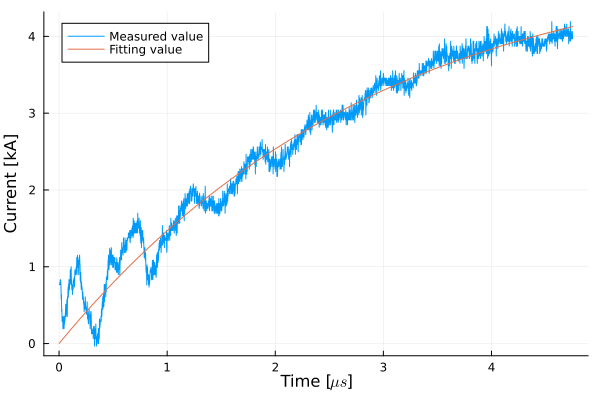

In [96]:
# モデルの定義
i1(t, p) = @. p[1] * (exp(p[2]*t) - exp(p[3]*t))
# 初期パラメータの推測
initial_params1 = [6400, 1e-6, 1]
# フィッティングの実行
fit_result1 = curve_fit(i1, df2.Time, df2.Volt*800, initial_params1)
# フィッティングされたパラメータ
fitted_params1 = fit_result1.param
println("Fitted Parameters1: ", fitted_params1)
# フィッティング結果を使用してy値を計算
yfit1 = i1(df2.Time, fitted_params1)
plot(df2.Time*1e6, df2.Volt*800/1e3, label="Measured value")
plot!(df2.Time*1e6 ,yfit1/1e3, label="Fitting value")
xlabel!(L"Time [$\mu s$]")
ylabel!("Current [kA]")

### 銅細線で消費されるエネルギー
$$
Q = \int^{t1}_{0} R i(t)^2dt
$$

In [97]:
# 銅細線で消費されるエネルギー
R1 = 0.035
A1 = fitted_params1[1]
λ1 = fitted_params1[2]
λ2 = fitted_params1[3]
t0 = t1.Time[1]
Q = R1*A^2*(exp(2*λ1*t0)/(2*λ1) - 2/(λ1+λ2)*exp((λ1+λ2)*t0) +exp(2*λ2*t0)/(2*λ2) - 1/(2*λ1)+ 2/(λ1+λ2) - 1/(2*λ2))
println("Energy consumption: ", Q, "[J]")

Energy consumption: 0.9854222386232577[J]


A: 5512.409541401488 λ1: -4052.3448564804276 λ2: -309665.18041712773 L: 5.312634878185674e-5


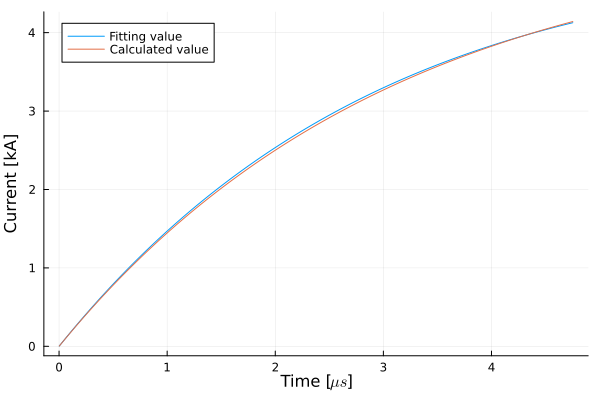

In [80]:
R = 70/6 + 5
L = - R /(fitted_params1[2] + fitted_params1[3])
C = 15e-6
V0 = 89.5e3

λ1 = -(R/(2L))+sqrt((R/2L)^2 - 1/(L*C))
λ2 = -(R/(2L))-sqrt((R/2L)^2 - 1/(L*C))
β = (λ1 - λ2)/2
A = V0/(2*β*L)

println("A: ", A, " λ1: " , λ1, " λ2: ", λ2, " L: ", L)

yfit2 = i1(df2.Time, [A, λ1, λ2])

#plot(df2.Time, df2.Volt*800)
plot(df2.Time*1e6 ,yfit1/1e3, label="Fitting value")
plot!(df2.Time*1e6 ,yfit2/1e3, label="Calculated value")
xlabel!(L"Time [$\mu s$]")
ylabel!("Current [kA]")

Fitted Parameters2: [5476.633632538489, 1.4569552918987924e-5, 5.158956862202522e-7]


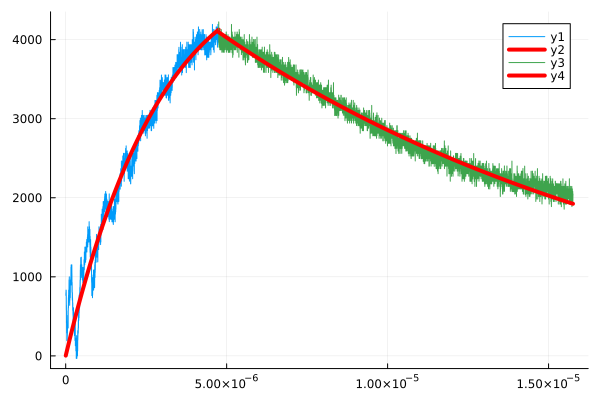

In [81]:
model2(x, p) = @. p[1] * exp(-((x - p[3]) /p[2]))
# 初期パラメータの推測
initial_params2 = [5300,17e-6,0]

# フィッティングの実行
fit_result2 = curve_fit(model2, df3.Time, df3.Volt*800, initial_params2)

# フィッティングされたパラメータ
fitted_params2 = fit_result2.param
println("Fitted Parameters2: ", fitted_params2)

# フィッティング結果を使用してy値を計算
yfit2 = model2(df3.Time, fitted_params2)

plot(df2.Time, df2.Volt*800)
plot!(df2.Time ,yfit1, linewidth=4, linecolor = :red)

plot!(df3.Time, df3.Volt*800)
plot!(df3.Time ,yfit2, linewidth=4, linecolor = :red)


In [ ]:
(40/0.12 * 0.1/(0.1+5+0.036))^2 * 0.035 * 20e-3

In [94]:
t1.Time[1]

4.754e-6